In [1]:
import pandas
import time
import matplotlib.pyplot as plt
import requests
import json

class RegistrodeTiempos:

    def __init__(self,nombre_funcionalidad):
        self.nombre_estructura = ""
        self.nombre_funcionalidad = nombre_funcionalidad
        self.n_datos = 0

        self.tiempo_inicio = 0
        self.tiempo_fin = 0

        try:
            self.datos = pandas.read_csv("asintotico/{}.csv".format(self.nombre_funcionalidad),index_col="Numero de datos")
        except:
            self.datos = pandas.DataFrame(columns=["SLL","LLT","DLL","CDLL","ColaArray","ColaLLT","ColaDLL"],
            index=[10**2,10**3,10**4,50000,10**5])
            self.datos.index.name = "Numero de datos"

    def iniciar_conteo(self,n,nombre_estructura):
        self.tiempo_inicio = time.time()
        self.nombre_estructura = nombre_estructura
        self.n_datos = n

    def finalizar_conteo(self):
        self.tiempo_fin = time.time()
        self.datos[self.nombre_estructura][self.n_datos] = self.tiempo_fin-self.tiempo_inicio
        self.datos.to_csv("asintotico/{}.csv".format(self.nombre_funcionalidad))

    def retornar_grafica(self,estructuras_de_datos):
        self.datos[estructuras_de_datos].plot()
        plt.title("{}".format(self.nombre_funcionalidad))
        plt.ylabel("Tiempo (segundos)")
        plt.savefig("asintotico/{}.png".format(self.nombre_funcionalidad))

In [3]:
#Medida de tiempos funcion crear_objeto
import json
import requests


f = open("Data/clientes.json",encoding="utf8")
clientes = json.load(f)
f.close()
clientes = list(clientes.items())

file_2 = open("Data/funcionarios.json",encoding="utf8")
dato_funcionario = json.load(file_2)
file_2.close()
id_funcionario = list(dato_funcionario.keys())[0]
funcionario = dato_funcionario[id_funcionario]
funcionario["id"] = id_funcionario


registro_de_tiempo = RegistrodeTiempos("Crear_usuario_pedido_o_articulo")

for i in range(0,10**5):
    dato_cliente = clientes[i]
    cliente = dato_cliente[1]
    cliente["id"]  = i
    if i==99 or i==999 or i==9999 or i==49999 or i==99999:
        #Función de interés a medir
        registro_de_tiempo.iniciar_conteo(i+1,"SLL")
        x = requests.post("http://127.0.0.1:5000/api/usuario/nuevo_cliente",cliente)
        registro_de_tiempo.finalizar_conteo()
    else:
        x = requests.post("http://127.0.0.1:5000/api/usuario/nuevo_cliente",cliente)

In [4]:
#Medida de tiempos funcion ver_consultar_objeto_en_posicion_i

registro_de_tiempo = RegistrodeTiempos("consultar_usuario_pedido_o_articulo_en_posicion_i")
for n in [10**2,10**3,10**4,50000,10**5]:
    #Función de interés a medir
    id_a_consultar = n-1
    argumento = {"id":id_a_consultar}
    registro_de_tiempo.iniciar_conteo(n,"SLL")
    x = requests.post("http://127.0.0.1:5000/api/usuario/consultar_usuario",argumento)
    registro_de_tiempo.finalizar_conteo()

In [5]:
#Medida de tiempos funcion actualizar_objeto_en_posicion_i
import json
import requests

registro_de_tiempo = RegistrodeTiempos("actualizar_usuario_pedido_o_articulo_en_posicion_i")
for n in [10**2,10**3,10**4,50000,10**5]:
    #Función de interés a medir
    id_a_actualizar = n-1
    argumento = {"id":id_a_actualizar,"atributo":"direccion","valor":"CL 20 40 50"}
    registro_de_tiempo.iniciar_conteo(n,"SLL")
    x = requests.post("http://127.0.0.1:5000/api/usuario/actualizar_usuario",argumento)
    registro_de_tiempo.finalizar_conteo()

In [6]:
#Medida de tiempos funcion eliminar_objeto_en_posicion_i
import json
import requests


registro_de_tiempo = RegistrodeTiempos("eliminar__usuario_pedido_o_articulo_en_posicion_i")
for n in [10**2,10**3,10**4,50000,10**5]:
    #Función de interés a medir
    id_a_eliminar = n-1
    argumento = {"id":id_a_eliminar}
    registro_de_tiempo.iniciar_conteo(n,"SLL")
    x = requests.post("http://127.0.0.1:5000/api/usuario/eliminar_usuario",argumento)
    registro_de_tiempo.finalizar_conteo()

In [2]:
#Medida de tiempos funcion anadir_pedido_a_cola_funcionario

import json
import requests


f = open("Data/pedidos.json",encoding="utf8")
pedidos = json.load(f)
f.close()
pedidos = list(pedidos.items())


#Creamos nuestro funcionario
file_2 = open("Data/funcionarios.json",encoding="utf8")
dato_funcionario = json.load(file_2)
file_2.close()
id_funcionario = list(dato_funcionario.keys())[0]
funcionario = dato_funcionario[id_funcionario]
funcionario["id"] = id_funcionario

#Empujamos nuestro funcionario
x = requests.post("http://127.0.0.1:5000/api/usuario/nuevo_funcionario",funcionario)



for i in range(0,10**5+5):
    dato_pedido = pedidos[i%100]
    pedido = dato_pedido[1]
    pedido["id"]  = i
    x = requests.post("http://127.0.0.1:5000/api/pedido/crear_pedido",pedido)
    argumento = {"id_funcionario":funcionario["id"],"id_pedido":pedido["id"]}
    if i==99 or i==1000 or i==10001 or i==50002 or i==100003:
        #Función de interés a medir
        dicc = {99:100,1000:1000,10001:10000,50002:50000,100003:100000}

        registro_de_tiempo = RegistrodeTiempos("Anadir_pedido_cola_funcionario")
        registro_de_tiempo.iniciar_conteo(dicc[i],"ColaLLT")
        x = requests.post("http://127.0.0.1:5000/api/pedido/anadir_pedido_a_funcionario",argumento)
        registro_de_tiempo.finalizar_conteo()

        registro_de_tiempo = RegistrodeTiempos("mostrar_proximo_pedido_cola_funcionario")
        registro_de_tiempo.iniciar_conteo(dicc[i],"ColaLLT")
        x = requests.post("http://127.0.0.1:5000/api/pedido/mostrar_pedido_en_cola",{"id_funcionario":funcionario["id"]})
        registro_de_tiempo.finalizar_conteo()

        registro_de_tiempo = RegistrodeTiempos("marcar_pedido")
        registro_de_tiempo.iniciar_conteo(dicc[i],"ColaLLT")
        argumento = {"id_funcionario":funcionario["id"],"valor":"entregado"}
        x = requests.post("http://127.0.0.1:5000/api/pedido/marcar_pedido",argumento)
        registro_de_tiempo.finalizar_conteo()

    else:
        x = requests.post("http://127.0.0.1:5000/api/pedido/anadir_pedido_a_funcionario",argumento)

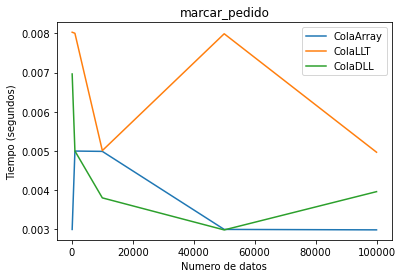

In [13]:
registro_de_tiempo = RegistrodeTiempos("marcar_pedido")
registro_de_tiempo.retornar_grafica(["ColaArray","ColaLLT","ColaDLL"])